루브릭 > sklearn dataset - 손글씨, 와인, 유방암 데이터 분석모델 구성

In [1]:
# 필요한 모듈  import

import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# project 1 -- 손글씨를 분류해봅시다! 

#데이터 업로드
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
#데이터 값 확인
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
len(digits.data)

1797

In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
len(digits.target)

1797

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [89]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [11]:
#데이터값 지정
digits_data = digits.data

In [12]:
#데이터값 지정
digits_label = digits.target

In [13]:
#train, test set 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=17)

In [14]:
#잘 분리되었는가 확인
print('X_train의 갯수:', len(X_train), 'X_test의 갯수:', len(X_test))

X_train의 갯수: 1437 X_test의 갯수: 360


In [15]:
print('y_train의 갯수:', len(y_train), 'y_test의 갯수:', len(y_test))

y_train의 갯수: 1437 y_test의 갯수: 360


In [16]:
#이미지에 대한 숫자 라벨링 확인 
digit = X_train[1]
digit_image = digit.reshape(8,8)

9


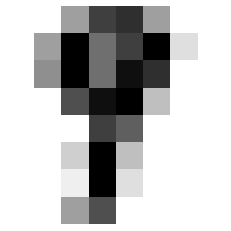

In [17]:
print(y_train[1])
plt.imshow(digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [18]:
#다양한 모델로 학습하기 -> sklearn에서 학습모델 decision-tree
decision_tree = DecisionTreeClassifier(random_state=32)

decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

In [19]:
#Random-forest
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [20]:
#svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [21]:
#sgd
sgd_model = SGDClassifier(random_state=32)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

In [22]:
#logistic
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = sgd_model.predict(X_test)

In [23]:
#숫자 분류문제의 경우 accuracy로 간단하게 해당 데이터에 관한 정확도 확인할 수 있다.
accuracy_score(y_pred_decision_tree, y_test)

0.8444444444444444

In [24]:
accuracy_score(y_pred_random_forest, y_test)

0.975

In [25]:
accuracy_score(y_pred_svm,y_test)
#손글씨 분류 모델에서 가장 높은 성능을 보여주는 것은 svm 모델임을 알 수 있음

0.9833333333333333

In [26]:
accuracy_score(y_pred_sgd ,y_test)

0.9416666666666667

In [27]:
accuracy_score(y_pred_logistic ,y_test)

0.9416666666666667

In [36]:
#분류기가 제대로 작동하는지 알기 위해 오차 행렬(confusion matrix)를 조사할 수도 있다. 즉 숫자 '5'가 5가 아닌 3로 분류된 횟수를 세는 식이다. 
#이를 위해 숫자 5만 판별하는 이진 분류기를 확률적 경사 하강법을 통해 모델을 재학습시킨 후 해당 모델에 대해 보다 정확한 평가를 시도해볼 수 있다.

In [39]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [41]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [42]:
confusion_matrix(y_train_5, y_train_pred)

#첫번째 행으로부터 전체 데이터에서 1274개를 5가 아닌 것으로 잘 분류하고, 22개를 5가 아닌 것이라 잘못 분류한 것을 알 수 있음. 
#두번째 행으로부터 전체 데이터에서 4개를 5가 아님으로 잘못 분류하고, 137개를 5로 정확히 분류하는 것을 확인할 수 있음.

array([[1274,   22],
       [   4,  137]])

In [44]:
confusion_matrix_heatmap = confusion_matrix(y_train_5, y_train_pred)

<AxesSubplot:>

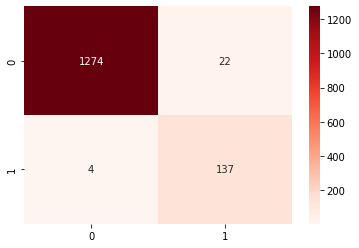

In [46]:
#sgd를 통해 만들어본 이진분류기를 두고 confusion matrix의 heatmap을 보여줄 수 있다.
import seaborn as sns
sns.heatmap(confusion_matrix_heatmap, annot=True, fmt='d', cmap='Reds')

In [47]:
#project2 -wine

In [48]:
#데이터 업로드
from sklearn.datasets import load_wine
wine = load_wine()

In [49]:
#데이터 확인
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [50]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [51]:
len(wine.data)

178

In [52]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [53]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [54]:
len(wine.target)

178

In [88]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [59]:
wine_data = wine.data

In [60]:
wine_label = wine.target

In [61]:
#train, test 분류
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label,
                                                    test_size=0.2,
                                                    random_state=17)

In [62]:
#분류 잘되었는지 여부 확인
print('X_train의 갯수:', len(X_train), 'X_test의 갯수:', len(X_test))

X_train의 갯수: 142 X_test의 갯수: 36


In [63]:
print('y_train의 갯수:', len(y_train), 'y_test의 갯수:', len(y_test))

y_train의 갯수: 142 y_test의 갯수: 36


In [64]:
#다양한 모델로 학습하기 -> sklearn에서 학습모델 decision-tree, 
decision_tree = DecisionTreeClassifier(random_state=32)

decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

In [82]:
#Random-forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [83]:
#svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [84]:
#sgd
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

In [85]:
#logistic
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = sgd_model.predict(X_test)

In [86]:
# data가 지나치게 imbalanced하면 accuracy와 같은 단순하고 직관적인 지표가 정확하지 않지만, 와인 0,1,2 데이터가 비교적 균등한편이라고 판단해
# accuracy 지표를 통해 확인할수 있다.
accuracy_score(y_pred_decision_tree, y_test)

0.9166666666666666

In [87]:
accuracy_score(y_pred_random_forest, y_test)

1.0

In [81]:
accuracy_score(y_pred_svm,y_test)

0.6666666666666666

In [72]:
accuracy_score(y_pred_sgd ,y_test)

0.5277777777777778

In [73]:
accuracy_score(y_pred_logistic ,y_test)

0.5277777777777778

In [95]:
#3 암환자 예측모델 데이터 로드
from sklearn.datasets import load_breast_cancer

In [96]:
cancer = load_breast_cancer()

In [97]:
#데이터 확인
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [98]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [99]:
len(cancer.data)

569

In [100]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [101]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [102]:
len(cancer.target)

569

In [103]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [104]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [105]:
cancer_data = cancer.data

In [106]:
cancer_label = cancer.target

In [107]:
#train, test데이터 분류
X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label,
                                                    test_size=0.2,
                                                    random_state=17)

In [108]:
#train, test 잘 분류되었는가 확인
print('X_train의 갯수:', len(X_train), 'X_test의 갯수:', len(X_test))

X_train의 갯수: 455 X_test의 갯수: 114


In [109]:
print('y_train의 갯수:', len(y_train), 'y_test의 갯수:', len(y_test))

y_train의 갯수: 455 y_test의 갯수: 114


In [110]:
#다양한 모델로 학습하기 -> sklearn에서 학습모델 decisiontree
decision_tree = DecisionTreeClassifier(random_state=32)

decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

In [111]:
#랜덤포레스트
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [112]:
#svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [113]:
#sgd
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

In [114]:
#logistic
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = sgd_model.predict(X_test)

In [115]:
#report print로 조회 이진분류 -> 암환자 진단하는 모델이므로 잘못된 진단을 내려서는 안된다! 따라서 Recall 중요
#Recall이 크다는 게 양성인데 음성으로 분류하는(fn) 것을 작게 만들어야만 한다. 

In [116]:
#각 모델별 recall값 평가
from sklearn.metrics import recall_score

In [117]:
recall_score(y_test, y_pred_decision_tree)

0.9605263157894737

In [118]:
recall_score(y_test, y_pred_random_forest)

0.9736842105263158

In [119]:
recall_score(y_test, y_pred_svm)

0.9868421052631579

In [120]:
recall_score(y_test, y_pred_sgd)

0.9605263157894737

In [121]:
recall_score(y_test, y_pred_logistic)

0.9605263157894737

In [122]:
#svm 모델이 성능이 가장 높은 recall값을 보여주고 있음을 확인가능.

 결국 중요한 물음은 어떤 모델을 쓸 것인가? 하는 것이다. 지금까지의 방식은 여러 모델의 accuracy를 전부 체크한 후 가장 높은 성능을 보여주는 것이 좋은 모델이라 판별했다면, 데이터를 보고난 후 분류를 위해 어떠한 모델을 선택하면 좋을 것인지에 대한 판단근거를 확보하는 방식은 대체 어떻게 되는 것일까! 이를 위해 선 개별 모델들에 대한 이해를 늘려야한다! 개별 모델에 대한 요약을 통해 간략하게 복습해보자! 

 시작하기에 앞서 사이킷런이 왜 좋은 라이브러리인지에 관한 설명이 흥미로워 이것부터 살펴보자. 결국 좋은 라이브러리의 정의는 '직관적'이어야한다는 사실에서 출발한다. 사이킷런의 경우 데이터 가공에 있어서는 etl의 transformer()로 처리가능하고, 모델의 훈련과 예측을 Estimator를 통해서 가능하다. 그리고 estimator에 fit/preditct가 존재한다. 즉 이거 전체를 하나의 파이프라인으로 묶어서 검증할 수 있다는 것이 사이킷런의 '직관성'을 보여준다. 좋은 라이브러리의 기준에 관해서 조금 더 알아볼 필요가 있을 것 같다.

1.선형회귀

선형회귀는 연속적인 종속 변수 y,x의 값에 따라 y의 값이 연속적으로 변화할 때, 즉 독립변수 x와 종속변수 y가 '선형적' 관계를 갖는다고 가정하고 이를 가장 잘 설명하는 회귀계수를 찾는 과정이다. 그렇다면 이 과정은 어떠한 '방향'으로 이루어져야하는가? 로그 우도값을 극대화함을 통해 학습하여야 한다.여기서 최대 우도 가정법(Maximum Likelihood Estimation)이라는 개념이 등장한다. 즉 표본 데이터로부터 발생확률을 구하고자 하는 미션이 주어졌을때, log likelihood function을 최대할 수 있는 것을 찾아야한다.

2.서포트 벡터 머신 

초평면을 가능한 최대 오차(margin)으로 클래스 분류를 수행!
Decision Boundary(결정 경계): 두 개의 클래스를 구분해 주는 선 
Margin: Decision Boundary와 Support Vector 사이의 거리
cost : decision boundary 와 margin의 경계 결정

SVM에서는 결정 경계를 정의하는 게 결국 서포트 벡터이기 때문에 데이터 포인트 중에서 서포트 벡터만 잘 골라내면 나머지 쓸 데 없는 수많은 데이터 포인트들을 무시할 수 있다. 그래서 매우 빠르다.

 서포터 벡터 머신모델을 설정하는데 있어 중요한 물음은 "이상치를 얼마나 허용할 것이냐?"이다. Outlier들을 허용하지 않고 기준을 까다롭게 마진을 잡으면 hard margin (서포트 벡터와 결졍 경계 사이의 거리가 매우 좁다)이 존재한다고 할 수 있다. 하지만, 오버피팅 문제가 여기서 발생한다. 반면 soft margin의 경우 너그럽게 아웃라이어들이 마진 안에 포함되도록 한다. 대신 여기선 학습이 제대로 안되는 undefitting 가능성 존재함.

*Margin 최대화 -> robustness 최대화하는 것과 이어진다. 여기서! robust의 의미가 뭐냐? data의 outlier들을 최소화해주는 것, 평균이 해당 데이터의 분포를 제대로 설명 못할 때 '중간값'은 robust'한 값이다. 

*왜 hyperplane이라 부르냐? 예를들어 iris dataset같은 경우에는 해당 분류에 사용될 수 있는 feature가 4개, 따라서 결정경계가 선이나, 평면이 아니라 초평면에 의해서 결정 경계가 구분! 

*커널 트릭에 대한 이해 역시 중요한데, 데이터가 선형적으로 구분이 되지 않을때 linear seperable하게 옮겨주는 작업이 필요하다.

3.Decision Tree

맨 위의 root node와 아랫단의 terminal node로 구분한다. 여기서 터미널 노드 간에는 교집합이 없는 것으로 설정하게 여러 변수들에 따라 분기해서 데이터를 분류하는 것에서 출발한다. 근데 무슨 기준으로 할 것이냐? 순도(homogeneity)가 증가하고, 불확실성(uncertainty)가 감소하는 방향으로! 우리는 이걸 정보획득(information gain)이라 하고, 이걸 목적으로 학습을 진행해보자! 중요한 것은 의사결정 나무가 비용함수를 최소화해야만 한다는 것!

*𝐶𝐶(𝑇)=𝐸𝑟𝑟(𝑇)+𝛼×𝐿(𝑇)

    CC(T)=의사결정나무의 비용 복잡도(=오류가 적으면서 terminal node 수가 적은 단순한 모델일 수록 작은 값)

    ERR(T)=검증데이터에 대한 오분류율

    L(T)=terminal node의 수(구조의 복잡도)

    Alpha=ERR(T)와 L(T)를 결합하는 가중치(사용자에 의해 부여됨, 보통 0.01~0.1의 값을 씀)


*모든 terminal node의 순도가 100%인 상태를 Full tree라 하는데, 적절한 수준에서 terminal node를 결합해 줘야한다. 왜냐하면 순도 100% 상태면 분기가 너무 많아서 학습데이터에 오버피팅되는 결과를 초래한다. 즉, terminal node가 너무 많으면 새로운 데이터에 대한 일반화 능력이 저하됨.

4.Random forest 

 Decision tree가 단일모델만 사용해서 특정 데이터에 과적합 현상 발생한다면? 달리 말해 "Decision tree가 단일모델만 사용해서 특정 데이터에 잘 작동할 가능성이 높기 때문에 이 문제를 어떻게 해결할꺼냐?"는 질문이 가능하다. 이때 나온 아이디어가 Random forest! 해당 data에서 feature들 중 random하게 설정해서 decision tree를 만들고, 거기서 제일 많이 나온 값을 최종예측값으로 선정한다. 즉 여러 결정 트리의 앙상블(ensemble)을 통하여 일반화 성능을 높이고, 과적합 위험을 줄인다.
5.SGD

SGD -->데이터 세트에서 랜덤하게 하나를 뽑아 각 단계의 예측 경사를 계산한다. 근데 데이터 전체로 하면 중복도 되고 오래걸리니까 무작위로 샘플링해보자 -> sgd 근데 정답 찾는다고는 보장 못함 -> 그래도 속도 빠르다! 이 문제를 해결하고자 등장한 방법이 뭐냐? 미니 배치 확률적 경사하강법이다.

Other)

 차원 축소 : raw data에서 차원수를 줄여 잠재된 관계를 도출하자! 즉 고려 중인 변수의 개수를 줄임을 통해 차원수(dimensionality)를 줄이면 잠재된 진정한 관계를 도출하기가 쉽다. 차원 축소를 위한 주요 방법들로 주성분 분석(PCA; principal component analysis), 특이값 분해(SVD; singular value decomposition), 잠재 디리클레 할당(LDA; latent Dirichlet allocation)이 있다.
 
끝으로)
어떤 분류모델을 쓸 것인가에 대한 판단을 지금까지 알아봤다면, 평가지표에 대한 이야기를 안할 수 없다. 이번 노드에서는 암환자 분류문제와 같이 Recall값이 중요한 케이스, digits data처럼 confusion matrix를 통해 임의의 단어를 오분류하는 binary문제로 바꾸어 정확도를 측정하는 케이스, 비교적 balanced data에 대해서 accuracy 지표를 통해 다중분류 문제에 대한 케이스를 살펴볼 수 있었다. 그러나 한 가지 의문이 남는 것은 Wine 분류 문제에서 과연 
Wine 분류 문제에 대한 평가지표를 Accuracy로 하는 것이 맞는가에 관한 것이다. 즉 주어진 Data가 비교적 balanced한 데이터라 판단했던 근거는 각 클래스에 대해 +-10정도의 차이라서 균형적 수준으로 바라볼 수 있지 않을까?라는 추측에 의한 것인데, 데이터가 imbalanced하다는 것이 어떠한 기준으로 판별할 수 있을지에 관해서 살펴보아야 한다.